<center><h1> PCA on Wisconsin Breast Cancer Dataset </h1></center>

### 1. Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Read the raw data in a pandas dataframe

In [2]:
df = pd.read_csv("wdbc.csv", header = None)
df.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 3. Data Description
<p>
1) ID number <br>
2) Diagnosis (M = malignant, B = benign) <br>
3-32) <br>

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)
</p>

### 4. Extract the columns which contain the necessary information.

- In this dataset, the first column is id which does not contribute to label prediction in anyway so it can be dropped.
- The second contains the class label itself, so it is not featured in the data to be processed as well.

In [4]:
data = df.iloc[:, 2:]

### 5. normalize the data by subtracting each column with its mean value

In [5]:
mean_normalized_data = data - data.mean()
mean_normalized_data.head()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,3.862708,-8.909649,30.830967,346.110896,0.02204,0.173259,0.211301,0.098181,0.060738,0.015912,...,9.11081,-8.347223,77.338787,1138.416872,0.029831,0.411335,0.439712,0.150794,0.170024,0.034954
1,6.442708,-1.519649,40.930967,671.110896,-0.01162,-0.025701,-0.001899,0.021251,0.000038,-0.006128,...,8.72081,-2.267223,51.538787,1075.416872,-0.008569,-0.067665,-0.030588,0.071394,-0.015076,0.005074
2,5.562708,1.960351,38.030967,548.110896,0.01324,0.055559,0.108601,0.078981,0.025738,-0.002808,...,7.30081,-0.147223,45.238787,828.416872,0.012031,0.170235,0.178212,0.128394,0.071224,0.003634
3,-2.707292,1.090351,-14.389033,-268.789104,0.04614,0.179559,0.152601,0.056281,0.078538,0.034642,...,-1.35919,0.822777,-8.391213,-312.883128,0.077431,0.612035,0.414712,0.142894,0.373724,0.089054
4,6.162708,-4.949649,43.130967,642.110896,0.00394,0.028459,0.109201,0.055381,-0.000262,-0.003968,...,6.27081,-9.007223,44.938787,694.416872,0.005031,-0.049265,0.127812,0.047894,-0.053676,-0.007166


In [6]:
mean_normalized_data.shape

(569, 30)

### 6. Calculate the co-variance matrix

In [7]:
co_var = mean_normalized_data.cov()
co_var.head()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
2,12.418920,4.907582,85.447142,1224.483409,0.008454,0.094197,0.190128,0.112475,0.014273,-0.007754,...,16.513749,6.433100,114.288570,1888.227223,0.009625,0.229249,0.387386,0.172393,0.035746,0.000450
3,4.907582,18.498909,34.439759,485.993787,-0.001415,0.053767,0.103692,0.048977,0.008419,-0.002321,...,7.329267,24.110148,51.745933,841.283832,0.007611,0.188010,0.270110,0.083491,0.027942,0.009260
4,85.447142,34.439759,590.440480,8435.772345,0.070836,0.714714,1.387234,0.802360,0.121922,-0.044859,...,113.858063,45.258113,792.328208,13026.148359,0.083526,1.742478,2.858506,1.231848,0.284300,0.022391
5,1224.483409,485.993787,8435.772345,123843.554318,0.876178,9.264931,19.244924,11.241958,1.459596,-0.703426,...,1637.521341,621.824934,11341.789807,192192.557633,0.992514,21.616602,37.634415,16.701789,3.125809,0.023756
6,0.008454,-0.001415,0.070836,0.876178,0.000198,0.000490,0.000585,0.000302,0.000215,0.000058,...,0.014487,0.003118,0.112879,1.655299,0.000259,0.001045,0.001276,0.000465,0.000343,0.000127


In [8]:
co_var.shape

(30, 30)

### 7. Calculate the Eigen Values and Eigen Vectors of this 30x30 co-variance matrix

In [9]:
values, vectors = np.linalg.eig(co_var)
values[0:5] #print eigen values

array([4.43782605e+05, 7.31010006e+03, 7.03833742e+02, 5.46487379e+01,
       3.98900178e+01])

In [10]:
vectors[0:5] #print eigen vectors

array([[ 5.08623202e-03,  9.28705650e-03, -1.23425821e-02,
        -3.42380473e-02, -3.54561138e-02, -1.31213101e-01,
         3.35131912e-02,  7.54924585e-02, -3.50549264e-01,
        -1.39559852e-01,  4.19346972e-01,  7.35141931e-01,
         2.18087182e-01,  8.10260113e-02,  1.37865559e-01,
         1.41957144e-01, -4.42129324e-02,  8.97292328e-02,
        -2.10057742e-02, -8.01074429e-02,  5.94747776e-02,
        -8.72363409e-03, -4.57847381e-03,  2.82894830e-02,
        -3.59617411e-03, -1.60336173e-03,  6.48447162e-04,
         2.79341068e-03, -3.25869730e-03,  5.12865810e-04],
       [ 2.19657026e-03, -2.88160658e-03, -6.35497857e-03,
        -3.62415111e-01,  4.43187450e-01, -2.13486089e-01,
        -7.84253475e-01,  6.87405638e-02,  4.08376429e-03,
        -7.66679112e-02, -2.90168453e-02, -1.77040388e-03,
         4.23058843e-03,  1.98471260e-03, -7.07543943e-03,
         3.71772553e-03,  1.74411881e-03, -1.41458884e-04,
        -1.24960485e-03,  2.12853660e-04, -5.08486619e-

### 8. Choosing Eigen Values and Eigen Vectors

- To take an estimate on how much weightage each eigen value carries, we divide each of the eigen values by the sum of the eigen values.
- Then we know what percentage of information will be carried by top 'k' eigen values

In [11]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), "\n", explained_variances)

0.9999999999999999 
 [0.9820446715106618, 0.01617648986351076, 0.001557510745015237, 0.00012093196354011586, 8.827245358462388e-05, 6.648839512390716e-06, 4.01713682008712e-06, 8.220171966558424e-07, 3.4413527861642794e-07, 1.8601872147782572e-07, 6.994732053520275e-08, 1.659088796401075e-08, 6.996416497623584e-09, 4.78318305595044e-09, 2.93549213906878e-09, 1.4168492662684358e-09, 8.295777313437436e-10, 5.204058825160893e-10, 4.08463982918978e-10, 3.6331337781610543e-10, 1.72849737483795e-10, 1.2748750827662478e-10, 7.726829729279096e-11, 6.283577183800723e-11, 3.573022948027758e-11, 2.7639604090654483e-11, 1.5534468046490907e-12, 8.144522589686126e-12, 6.30211541228752e-12, 4.436669445208337e-12]


- We see that the top two eigen values convey about 99.8% of the information carried by the 30 dimension dataset.
- Hence we choose the top two eigen vectors and take their dot product with our data set.
- Hence our data will be reduced from 569x30 to (569x30)*(30x2) = 569x2

In [12]:
projected_1 = data.dot(vectors.T[0])
projected_2 = data.dot(vectors.T[1])

In [13]:
res = pd.DataFrame(projected_1, columns=["PC1"])
res["PC2"] = projected_2
res["label"] = df.iloc[:, 1]
res

,PC1,PC2,label
0,2260.013886,-187.960301,M
1,2368.993756,121.587424,M
2,2095.665202,145.113986,M
3,692.690510,38.576923,M
4,2030.212493,295.297984,M
...,...,...,...
564,2513.997996,216.179735,M
565,2144.890167,183.014831,M
566,1414.373069,153.510768,M
567,2224.729428,140.086467,M


### 9. Plotting the dataset

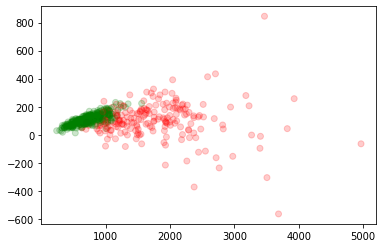

In [14]:
color= {'M':'r', 'B':'g'}
plt.scatter(res["PC1"], res["PC2"], c = res["label"].map(color), alpha = 0.2)
plt.show()